### Questions
* 

### Objectives
YWBAT
* give 3 examples of when logistic regression is used in the real world
    * Credit Approval
    * Something binary yes vs no
    * Disease prediction
    * Multi Class Labeling-> Multiple Models
* explain how linear regression is tied to logistic regression
* explain the purpose of a sigmoid function
* When does a high vs low threshold in logistic regression predictions

### Outline

In [9]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs


import matplotlib.pyplot as plt
import seaborn as sns

### What is a possible scenario for X and Y
* X represents the number of purchases made compared to mean number of purchases
* Y represents if that client is going to renew their subscription

### Let's load in some mocked data

In [10]:
df = pd.read_csv("data.csv")
x = df["x"]
y = df["y"]
df.head()

,x,y
0,0.514780,1.0
1,-3.279173,0.0
2,-3.845859,0.0
3,0.947575,1.0
4,1.884433,1.0


### Plotting our points with color

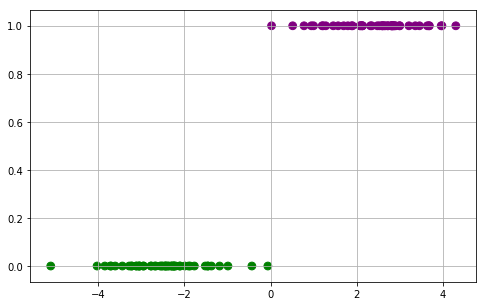

In [12]:
color_dict = {0: 'green', 1: 'purple'}
colors = [color_dict[j] for j in y]


plt.figure(figsize=(8, 5))
plt.grid()
plt.scatter(x, y, color=colors, s=60)
plt.show()

# If a client is at x = -3, -3 purchases under
# This client probably will not renew (Y=0)

# Who is a client with a high probability of renewing?
# Anyone positive (x-value) is going to renew (we predict). 

# We will have a hard time predicting around 0, since we have a y=0 and y=1 at x = 0

### Why is Linear Regression no longer sufficient?

Because it's unbounded and our y-values are bound to 0 and 1


We put our linear regression into a transformation function

### How can we estimate these points?     

$$f(x)= \frac{1}{1 + e^{-c_1(x - c_2)}}$$ 


![](logreg.gif)

In [13]:
def sigmoid(x, b0=0, b1=4):
    num = 1
    den = 1 + np.exp(-(b0 + b1*x))
    return num/den

In [25]:
# get the y_preds
y_pred = sigmoid(x, 0, 4)

In [26]:
def make_plot(x, y, y_pred):
    # Plot both our predictions and out points 
# We need a color dictionary
    color_dict = {0: 'green', 1: 'purple'}
    colors = [color_dict[j] for j in y]


    plt.figure(figsize=(8, 5))
    plt.grid()
    plt.scatter(x, y, color=colors, s=60)
    plt.scatter(x, y_pred)
    plt.show()

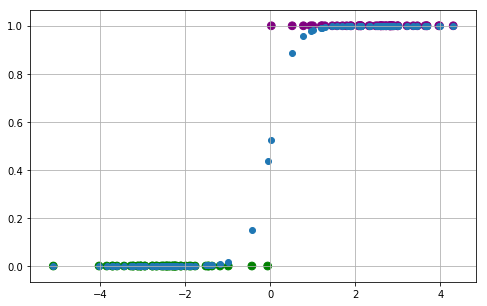

In [27]:
make_plot(x, y, y_pred)

### Why are these labels better than our y_preds
    * We can start predicting once we have labels

### What are the y_pred values similar to? Probability

In [55]:
def get_labels(y_pred, thresh=0.50):
    labels = []
    for pred in y_pred:
        if pred <= 0.50:
            labels.append(0)
        else:
            labels.append(1)
    return labels

In [34]:
y_pred_labels = get_labels(y_pred)

In [48]:
pndict = get_p_n_dict(y, y_pred_labels)
print(pndict)
accuracy(pndict), recall(pndict), precision(pndict), f1(pndict)

{'TP': 50, 'FP': 1, 'TN': 49, 'FN': 0}


(0.99, 1.0, 0.9803921568627451, 0.99009900990099)

In [51]:
def get_p_n_dict(y_true, y_pred):
    p_n_dict = {"TP": 0, "FP": 0, "TN": 0, "FN": 0}
    for actual, pred in zip(y_true, y_pred):
        if pred == 0:
            if actual == 1:
                p_n_dict["FN"] += 1
            if actual == 0:
                p_n_dict["TN"] += 1
        if pred == 1:
            if actual == 1:
                p_n_dict["TP"] += 1
            if actual == 0:
                p_n_dict["FP"] += 1
    return p_n_dict


# False Negative Rate
# Use when: contagious disease testing
# False Negative -> someone isn't sick when they are
# Better safe than sorry method
def recall(pndict):
    num = pndict["TP"]
    den = pndict["TP"] + pndict["FN"]
    return num/den

# False Positive Rate
# Use when: credit approval
# False Positive -> you approved a loan to a person that can't pay it back
# Really careful on what you want to call a 1 vs a 0. 
def precision(pndict):
    num = pndict["TP"]
    den = pndict["TP"] + pndict["FP"]
    return num/den


# Harmonic mean of recall and precision
def f1(pndict):
    num = 2 * precision(pndict) * recall(pndict)
    den = precision(pndict) + recall(pndict)
    return num/den


# How much did I get correct? 
# Prone to overfitting on imbalanced data
def accuracy(pndict):
    num = pndict["TP"] + pndict["TN"]
    den = sum(pndict.values())
    return num/den

In [52]:
# How can we measure our 'goodness' of fit?
labels = get_labels(y_pred)
pndict = get_p_n_dict(y, labels)

In [53]:
accuracy(pndict)

0.99

In [54]:
# get new labels based on a threshold
labels = get_labels(y_pred)
pndict = get_p_n_dict(y, labels)
recall(pndict), precision(pndict), accuracy(pndict), f1(pndict)

(1.0, 0.9803921568627451, 0.99, 0.99009900990099)

In [56]:
cm = confusion_matrix(y, labels)
cm

array([[49,  1],
       [ 0, 50]])

In [57]:
def plot_confusion(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, cmap=sns.color_palette('Purples'), fmt='0g', annot_kws={"ha":"center", "va":"top"})
    sns.heatmap(cm/np.sum(cm), annot=True, cmap=sns.color_palette('Purples'), fmt='0.01%', annot_kws={"ha":"center", "va":"bottom"})
    plt.xlabel("Pred", fontsize=16)
    plt.ylabel("Actual", fontsize=16)
    plt.show()

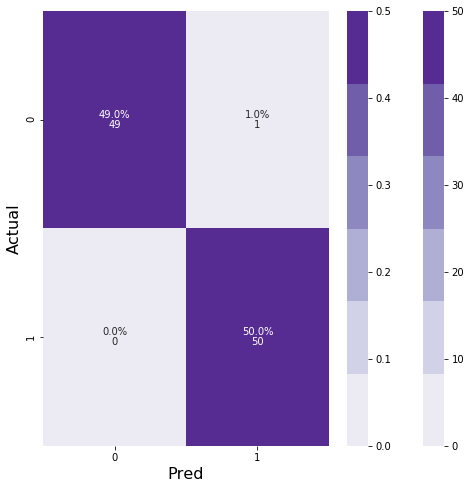

In [58]:
plot_confusion(y, labels)

### What about thresholds?

In [59]:
def get_labels(y_pred, thresh=0.50):
    labels = []
    for pred in y_pred:
        if pred <= 0.50:
            labels.append(0)
        else:
            labels.append(1)
    return labels

In [96]:
logreg = LogisticRegression(fit_intercept=False, penalty='l2', n_jobs=-1, solver='lbfgs')

In [97]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.80)

In [98]:
logreg.fit(xtrain.values.reshape(-1, 1), ytrain.values.reshape(-1, 1))

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
### out of the box predictions using sklearn uses 50% threshold
logreg.predict(xtest.values.reshape(-1, 1))

array([0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0.])

In [100]:
probs = logreg.predict_proba(x.values.reshape(-1, 1)) 

probs[:5] # Prob(0|x), Prob(1|x)

array([[2.53203038e-01, 7.46796962e-01],
       [9.98982972e-01, 1.01702822e-03],
       [9.99690584e-01, 3.09415948e-04],
       [1.20156988e-01, 8.79843012e-01],
       [1.87180482e-02, 9.81281952e-01]])

In [101]:
def get_labels_predict_proba(probs, thresh=0.50):
    labels = []
    for prob in probs:
        if prob[1] >= thresh:
            labels.append(1)
        else:
            labels.append(0)
    return labels

In [102]:
new_labels = get_labels_predict_proba(probs, thresh=0.50)

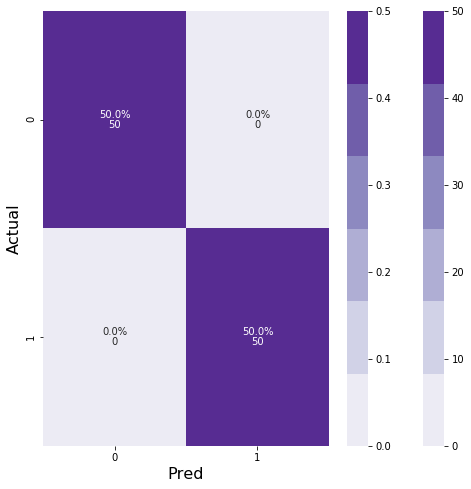

In [103]:
plot_confusion(y, new_labels)

In [104]:
logreg.coef_, logreg.intercept_

(array([[2.10109466]]), array([0.]))

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer

In [106]:
cv = cross_val_score(logreg,x.values.reshape(-1, 1), y.values.reshape(-1, 1), cv=5, scoring=make_scorer(f1_score))
cv

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning

array([1., 1., 1., 1., 1.])

### Assessment
- Learned about thresholds and how to set thresholds
- Pros and cons for labeling function
- I learned how to put both numbers and percentages on heatmap
- Sigmoid can be interpreted as a probability function, though it isn't exclusively one
- Confusion Matrix analysis separates the wheat and the chaff 